In [1]:
import pandas as pd
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal 
from sklearn.datasets import make_blobs

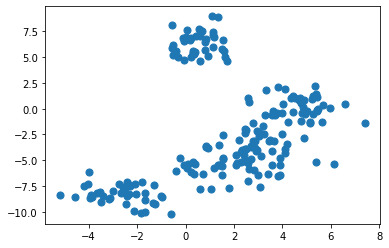

(200, 2)


In [2]:
number_of_clusters = 5
X, y = make_blobs(n_samples = 200, centers = number_of_clusters)


points_data = plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')

plt.show()

print(X.shape)


In [3]:
#number of data
n = 200
#number of clusters
k = 3
#dimension of cluster
d = 2
# m parameter
m = 2
#number of iterations
MAX_ITERS = 12

In [4]:
def initializeMembershipWeights():

    weight = np.random.dirichlet(np.ones(k),n)
    weight_arr = np.array(weight)
    return weight_arr

In [5]:
#print(initializeMembershipWeights())
weight_arr = initializeMembershipWeights()
print(weight_arr.shape)

(200, 3)


In [6]:
a1 = np.asarray([[1,2,3],[1,2,3]])
a2 = np.asarray([2,2])
#print(a1.shape)
#print(a2.shape)
#print(a2.dot(a1))
#print((a1.T / a2).T)
print(a1.sum(axis = 0))

[2 4 6]


In [7]:
def updateCentroids(weight_arr, data):
    Wij_power_m = np.power(weight_arr,m) 
    term1 = data.T.dot(Wij_power_m).T
    term2 = Wij_power_m.sum(axis = 0)
    V = (term1.T / term2).T  
    return V     

In [8]:
c2 = updateCentroids(weight_arr, X)

print(c2)

[[ 1.34465454 -2.08297557]
 [ 1.48007082 -2.42077253]
 [ 1.60308634 -2.45525552]]


In [9]:
arr1 = np.asarray([[1,1,1,1],[1,1,1,1],[1,1,1,1]])
#print(arr1.shape)
arr2 = np.asarray([2,2,1,1])
#print(arr2.shape)

arr3 = arr2 - arr1
#print(arr3.shape)
#print(np.sum(arr3, axis=0).shape)
print(np.identity(5, dtype = None))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [10]:
def updateDistances(V,A, data):
    
    clusters = V.shape[0]
    samples = data.shape[0]
        
    dist = np.zeros((samples, clusters))
    
    for i in range(0, clusters):
        for j in range(0,samples):
            dist_L1 = data[j,:] - V[i]
            dist_L2 = dist_L1.T.dot(dist_L1.dot(A))
            dist[j,i] = np.sqrt(dist_L2)

    return dist
        

def updateWeightsv2(weight_arr,V,dist, data):
    
    clusters = V.shape[0]
    samples = data.shape[0]
    
    U = np.zeros((weight_arr.shape[0], weight_arr.shape[1]))

    for i in range(0, clusters):
        for j in range(0,samples):
            term = 0
            for k in range(0, clusters):
                term += np.power(np.divide(dist[j,i],dist[j,k]),2/(m-1))
            U[j,i] = np.divide(1, term)
            
    return U    

In [11]:
c2 = updateCentroids(weight_arr, X)

print(c2)

A = np.identity(2, dtype = None)
dist = updateDistances(c2,A, X)
#print(dist)
u2 = updateWeightsv2(weight_arr,c2,dist, X)

[[ 1.34465454 -2.08297557]
 [ 1.48007082 -2.42077253]
 [ 1.60308634 -2.45525552]]


In [12]:

print(u2[111])

[0.28346533 0.32966416 0.38687052]


In [13]:
def plotData(z,C):  
    plt.subplot(4,3,z+1)              #scatter plot of sepal length vs sepal width                              
    plt.scatter(list(df.iloc[:,2]), list(df.iloc[:,3]), marker='o')    
    for center in C:
        plt.scatter(center[2],center[3], marker='o',color='r')        
    plt.axis('equal')                                                                 
    plt.xlabel('Sepal Length', fontsize=16)                                                 
    plt.ylabel('Sepal Width', fontsize=16)                                                                                      
    plt.grid()                                                  

In [14]:
def FuzzyMeansAlgorithm():
    weight_arr = initializeMembershipWeights() 
    for z in range(MAX_ITERS):
        C = updateCentroids(weight_arr,X)
        A = np.identity(d, dtype = None)
        dist = updateDistances(C,A,X)
        u = updateWeightsv2(weight_arr,C,dist,X)
        weight_arr = u
    plt.show()
    return (weight_arr,C)



In [15]:
final_weights,Centers = FuzzyMeansAlgorithm()

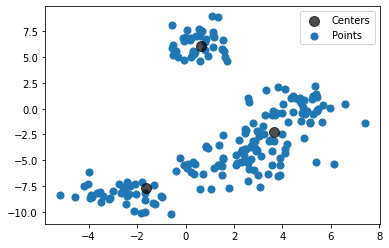

In [16]:
points_data = plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')

centers = plt.scatter(Centers[:, 0], Centers[:, 1], c='black', s=100, alpha=0.7)

plt.legend((centers, points_data),
           ("Centers", "Points"))

plt.show()

In [40]:
# Gustafson kessel

def compute_covariance(X, Centers, weight_arr):
    um = np.power(weight_arr,m)
    under_fraction = um.sum(1).reshape(-1, 1, 1)
    own_shape = X.reshape(X.shape[0], 1, -1) - Centers.reshape(1, Centers.shape[0], -1)
    temp = np.expand_dims(own_shape, axis=3)
    temp2 = temp **2  + 1e-19
    temp = np.matmul(temp, temp.transpose((0, 1, 3, 2)))
    upper_fraction = um.T.reshape(um.shape[1], um.shape[0], 1, 1) * temp
    upper_fraction = upper_fraction.sum(0)
    middel_fraction = upper_fraction.sum(0) + upper_fraction.sum(0)
    return upper_fraction / under_fraction

In [41]:
    def dist(X, Centers, fraction):
        own_shape = X.reshape(X.shape[0], 1, -1) - Centers.reshape(1, Centers.shape[0], -1)
        dif = np.expand_dims(own_shape, axis=3)
        det_covariance_fuzzy = np.linalg.det(fraction)
        degreeFuzzines = m
        determ = np.power(det_covariance_fuzzy, 1 / degreeFuzzines)
        new_covariance_fuzzy =  np.linalg.pinv(fraction)                     
        det_time_inv = determ.reshape(-1, 1, 1) * new_covariance_fuzzy
        temp = np.matmul(dif.transpose((0, 1, 3, 2)), det_time_inv)
        temp = np.matmul(temp, dif)
        output = np.squeeze(temp)
        return np.fmax(output.T, 1e-8)

In [42]:
def updateMemberhipMatrix(distances):
        power = float(1 / (m - 1))
        distances = distances.T
        own_shape = distances.shape[-1]
        under_fraction = distances.reshape((distances.shape[0], 1, -1)).repeat(own_shape, axis=1)
        dived = distances[:, None, :] / under_fraction.transpose((0, 2, 1))
        under_fraction = np.power(dived, power)
        sumation = under_fraction.sum(1)
        under_fraction = 1 / sumation
        sumation = np.power(sumation,power)
        under_fraction = under_fraction.T

        return under_fraction

In [43]:
def update_centers(z, u):
    um = np.power(u,m)
    temp = np.matmul(um,z).T
    res = (temp / um.sum(axis=1))
    return res.T

In [44]:
def GustafsonKesselAlgorithm():
    weight_arr = initializeMembershipWeights().T
    for z in range(MAX_ITERS):
        C = update_centers(X,weight_arr)
        F = compute_covariance(X, C, weight_arr)
        distances = dist(X, C, F)
        u = updateMemberhipMatrix(distances)
        weight_arr = u
    plt.show()
    return (weight_arr,C)

In [45]:
final_weights,Centers_GK = GustafsonKesselAlgorithm()

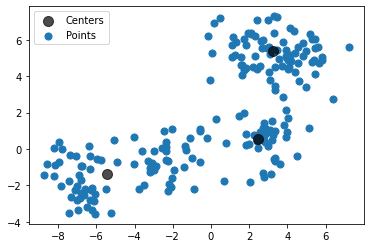

In [46]:
points_data = plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')

centers = plt.scatter(Centers_GK[:, 0], Centers_GK[:, 1], c='black', s=100, alpha=0.7)

plt.legend((centers, points_data),
           ("Centers", "Points"))

plt.show()